In [22]:
import glob
import os
import cv2
import numpy as np
from PIL import Image,ImageDraw
import matplotlib.pyplot as plt

## 自己寫的函式庫(匯入使用)

In [30]:
import CompareImageII
import Harr
f1='OG001.jpg'
f2='OG008.jpg'
#一定要"/"，這個方向
file1='Screen/transport/OG/'+f1
file2='Screen/transport/OG/'+f2
print(CompareImageII.CompareAlgo(file1,file2))

file3='Screen/transport/'+f1
file4='Screen/transport/'+f2
img1=cv2.imread(file3)
img2=cv2.imread(file4)
print(CompareImageII.calculate(img1,img2))

False
[0.58087707]


## 尋找黑色元素

In [4]:
def replace_color_tran(img, src_clr):
    #要用cv2.imread來開檔案，不然會有src錯誤
    Count_Black=0
    ret,thresh1 = cv2.threshold(img,100,200,cv2.THRESH_BINARY)
    print("Binary_Inv")
    #Test 1，有問題
    contours,hierarchy=cv2.findContours(thresh1,cv2.RETR_TREE,cv2.CHAIN_APPROX_SIMPLE)
    cv2,drawContours(img,contours,-1,(0,0,255),3)
    
    cv2.imshow("img", img)  
    cv2.waitKey(0) 
    '''
    #Test 2，找不太到
    img_arr = np.asarray(thresh1, dtype=np.double)
    for i in range(img_arr.shape[1]):
        for j in range(img_arr.shape[0]):
            if (img_arr[j][i] == src_clr)[0] == True:
                Count_Black+=1
    return Count_Black
    '''

In [9]:
img=cv2.imread('Screen/transport/OG008.jpg')
img2=cv2.imread('Screen/transport/OG005.jpg')
print('白色兩刀',replace_color_tran(img,(255,255,255)))
print('白色一刀',replace_color_tran(img2,(255,255,255)))

Binary_Inv


error: OpenCV(4.5.1) C:\Users\appveyor\AppData\Local\Temp\1\pip-req-build-oduouqig\opencv\modules\imgproc\src\contours.cpp:197: error: (-210:Unsupported format or combination of formats) [Start]FindContours supports only CV_8UC1 images when mode != CV_RETR_FLOODFILL otherwise supports CV_32SC1 images only in function 'cvStartFindContours_Impl'


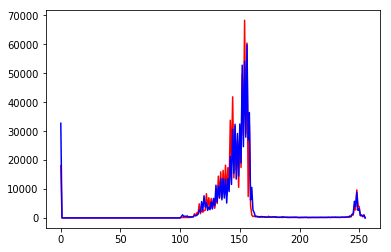

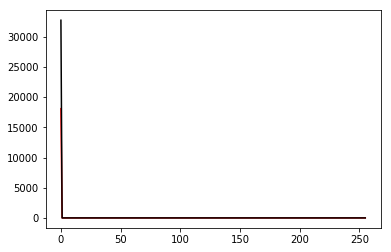

In [108]:
img=cv2.imread('Screen/transport/OG003.jpg',0)
img_cut=cv2.imread('Screen/transport/OG008.jpg',0)
UP=255;LOWER=100
#像素多的二值化
ret,thresh1=cv2.threshold(img,LOWER,UP,cv2.THRESH_TOZERO)
ret,thresh2=cv2.threshold(img_cut,LOWER,UP,cv2.THRESH_TOZERO)
hist1 = cv2.calcHist([thresh1],[0],None,[256],[0.0,255.0]) 
hist2 = cv2.calcHist([thresh2],[0],None,[256],[0.0,255.0]) 
plt.plot(range(256),hist1,'r') 
plt.plot(range(256),hist2,'b') 
plt.show() 
#只留黑色切割
ret,thresh3=cv2.threshold(img,LOWER,UP,cv2.THRESH_BINARY)
ret,thresh4=cv2.threshold(img_cut,LOWER,UP,cv2.THRESH_BINARY)
hist3=cv2.calcHist([thresh3],[0],None,[256],[0.0,255.0])
hist4=cv2.calcHist([thresh4],[0],None,[256],[0.0,255.0])
plt.plot(range(256),hist3,'r')
plt.plot(range(256),hist4,'k')
#只留白色切割
ret,thresh5=cv2.threshold(img,LOWER,UP,cv2.THRESH_BINARY_INV)
ret,thresh6=cv2.threshold(img_cut,LOWER,UP,cv2.THRESH_BINARY_INV)

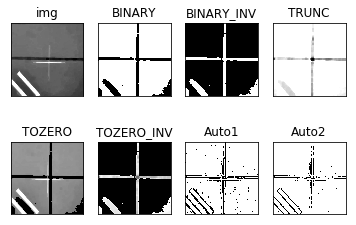

In [27]:
img = cv2.imread('Screen/transport/OG003.jpg',0)
img_cut = cv2.imread('Screen/transport/OG007.jpg',0)
#(影像,分類閥值,賦予新值,選擇參數)
UP=255
LOWER=120
ret,thresh1 = cv2.threshold(img_cut,LOWER,UP,cv2.THRESH_BINARY)
ret,thresh2 = cv2.threshold(img_cut,LOWER,UP,cv2.THRESH_BINARY_INV)
ret,thresh3 = cv2.threshold(img_cut,LOWER,UP,cv2.THRESH_TRUNC)

ret,thresh4 = cv2.threshold(img_cut,LOWER,UP,cv2.THRESH_TOZERO)

ret,thresh42 =cv2.threshold(img,LOWER,UP,cv2.THRESH_TOZERO)

ret,thresh5 = cv2.threshold(img_cut,LOWER,UP,cv2.THRESH_TOZERO_INV)
thresh6 = cv2.adaptiveThreshold(img_cut,LOWER,cv2.ADAPTIVE_THRESH_MEAN_C,cv2.THRESH_BINARY,11,2)
thresh7 = cv2.adaptiveThreshold(img_cut,LOWER,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,cv2.THRESH_BINARY,11,2)

#存檔

    
titles = ['img','BINARY','BINARY_INV','TRUNC','TOZERO','TOZERO_INV','Auto1','Auto2']
images = [img,thresh1,thresh2,thresh3,thresh4,thresh5,thresh6,thresh7]
for i in range(8):
    plt.subplot(2,4,i+1),plt.imshow(images[i],'gray')
    plt.title(titles[i])
    plt.xticks([]),plt.yticks([])
plt.show()

## BubbleSort Test

In [82]:
def bubbleSort(arr): 
    n = len(arr) 
    # Traverse through all array elements 
    for i in range(n-1): 
    # range(n) also work but outer loop will repeat one time more than needed. 
    # Last i elements are already in place 
        for j in range(0, n-i-1): 
            
            # traverse the array from 0 to n-i-1 
            # Swap if the element found is greater 
            # than the next element 
            if arr[j] > arr[j+1] : 
                arr[j], arr[j+1] = arr[j+1], arr[j] 


In [83]:
# Driver code to test above 
arr = [64, 34, 25, 12, 22, 11, 90] 
  
bubbleSort(arr) 
  
print ("Sorted array is:") 
for i in range(len(arr)): 
    print ("%d" %arr[i])

Sorted array is:
11
12
22
25
34
64
90


## 兩兩截圖比對

In [67]:
#比對等待(等待秒,截圖數量)
def sleep_compare(sec):
    #讀進前面截圖的資料
    filepath='Screen\\Test\\'
    myfiles=glob.glob(filepath+'*.jpg')
    #宣告字典
    ImageArray=[]
    for i,f in enumerate(myfiles):
        #放到Arraay排隊
        ImageArray.append(f)
        print("檔案",ImageArray[i])
    #不能用len(Imagelist) 因int是不可以疊帶
    for i in ImageArray:
        #算數量
        count=0
        count+=1
    
    print("檔案",ImageArray)
    try:
        #判斷裡面沒大於2張無法比較
        if len(ImageArray)<=1:
            print("End")
        #如果超過兩張就兩兩比較
        if len(ImageArray)>=2:
            print("Start")
            #兩兩拉出 1跟2比，2跟3比，3跟4比
            N=len(ImageArray)-1
            #從i=0，j=0開始
            for  i in range(N):
                    print("///////比對///////",i+1,"次///////////////")
                    print("///////此次///////",ImageArray)
                #判斷裡面沒大於2張無法比較
                    if len(ImageArray)<1:
                        print("End 結束")
                    else:
                        
                        #取檔案順序
                        File1=0
                        File2=1
                        print("比對 開檔",i)

                        #從隊伍撈出來開檔案
                        img1=Image.open(ImageArray[File1])
                        print('//1//',ImageArray[File1])
                        #取檔名
                        File1Name=str(ImageArray[File1]).split("\\")[-1]
                        #停頓
                        #await asyncio.sleep(sec)
                        #img1.show()
                        #刪掉list第一個值(被開的檔名)
                        #ImageArray.remove(str(ImageArray[File1]))
                        img2=Image.open(ImageArray[File2])
                        print('//2//',ImageArray[File2])
                        #取檔名
                        File2Name=str(ImageArray[File1]).split("\\")[-1]
                        #刪掉list第一個值(被開的檔名)
                        #ImageArray.remove(str(ImageArray[File2]))
                        #img2.show()
                        print("取檔案OK，開始比對圖片")
                        #比對相似度
                        rate=CompareImageII.CompareAlgo(ImageArray[File1],ImageArray[File2])
                        if(rate==True):

                            #RemoveFile=ImageArray[File1]
                            try:
                                #另存檔案
                                #注意斜線
                                img1.save('Screen\\Test\\double\\'+File1Name)
                                ImageArray.remove(str(ImageArray[File1]))
                            except OSError as e:
                                print(e)

                            print("相同 刪除",File1Name)
                        else:
                            ImageArray.remove(str(ImageArray[File1]))
                            ImageArray.remove(str(ImageArray[File2]))
                            print("不相同  刪除",File1," & ",File2)
    except EOFError as e:
        print("檔案錯誤",e)


    print("i結束",i)
                        
                    
    print(ImageArray)
        
        

In [68]:
sleep_compare(1)

檔案 Screen\Test\scan001.jpg
檔案 Screen\Test\scan002.jpg
檔案 Screen\Test\scan003.jpg
檔案 Screen\Test\scan005.jpg
檔案 Screen\Test\scan006.jpg
檔案 Screen\Test\scan007.jpg
檔案 Screen\Test\scan008.jpg
檔案 Screen\Test\scan04.jpg
檔案 ['Screen\\Test\\scan001.jpg', 'Screen\\Test\\scan002.jpg', 'Screen\\Test\\scan003.jpg', 'Screen\\Test\\scan005.jpg', 'Screen\\Test\\scan006.jpg', 'Screen\\Test\\scan007.jpg', 'Screen\\Test\\scan008.jpg', 'Screen\\Test\\scan04.jpg']
Start
///////比對/////// 1 次///////////////
///////此次/////// ['Screen\\Test\\scan001.jpg', 'Screen\\Test\\scan002.jpg', 'Screen\\Test\\scan003.jpg', 'Screen\\Test\\scan005.jpg', 'Screen\\Test\\scan006.jpg', 'Screen\\Test\\scan007.jpg', 'Screen\\Test\\scan008.jpg', 'Screen\\Test\\scan04.jpg']
比對 開檔 0
//1// Screen\Test\scan001.jpg
//2// Screen\Test\scan002.jpg
取檔案OK，開始比對圖片
相同 刪除 scan001.jpg
///////比對/////// 2 次///////////////
///////此次/////// ['Screen\\Test\\scan002.jpg', 'Screen\\Test\\scan003.jpg', 'Screen\\Test\\scan005.jpg', 'Screen\\Test\\scan